<a href="https://colab.research.google.com/github/Jeongyoon-Jang/covid19_data_analysis/blob/main/2019%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
test19 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/seouldata/test19_f.csv")
train_data19 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/seouldata/train19_data_f.csv")
train19 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/seouldata/train19_f.csv")

In [ ]:
# 타겟변수를 상권변화지표로 설정

In [ ]:
target=train19['상권_변화_지표']

In [ ]:
train19

,점포_수,개업_점포_수,폐업_점포_수,당월_매출_금액,당월_매출_건수,총_유동인구_수,집객시설_수,총_직장_인구_수,아파트_단지_수,상권_변화_지표
0,0.002075,0.000000,0.001876,0.009962,0.001909,0.010203,0.011804,0.001449,0.000000,1.0
1,0.007708,0.005208,0.000000,0.017615,0.019592,0.038733,0.011804,0.000433,0.004348,1.0
2,0.019862,0.031250,0.011257,0.020736,0.026429,0.068070,0.043845,0.004631,0.000000,1.0
3,0.010079,0.020833,0.001876,0.018542,0.029551,0.142521,0.025295,0.002248,0.156522,1.0
4,0.007189,0.000000,0.015009,0.014132,0.010044,0.016472,0.016863,0.000239,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...
3113,0.009931,0.041667,0.013133,0.027660,0.026105,0.043711,0.043845,0.012810,0.002174,1.0
3114,0.017268,0.052083,0.013133,0.022301,0.025917,0.041217,0.013491,0.000403,0.028261,0.0
3115,0.000593,0.000000,0.000000,0.000914,0.001168,0.003501,0.003373,0.000224,0.000000,1.0
3116,0.012080,0.031250,0.009381,0.009059,0.013231,0.191432,0.038786,0.001419,0.089130,0.0


In [ ]:
train19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3118 entries, 0 to 3117
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   점포_수       3118 non-null   float64
 1   개업_점포_수    3118 non-null   float64
 2   폐업_점포_수    3118 non-null   float64
 3   당월_매출_금액   3118 non-null   float64
 4   당월_매출_건수   3118 non-null   float64
 5   총_유동인구_수   3118 non-null   float64
 6   집객시설_수     3118 non-null   float64
 7   총_직장_인구_수  3118 non-null   float64
 8   아파트_단지_수   3118 non-null   float64
 9   상권_변화_지표   3118 non-null   float64
dtypes: float64(10)
memory usage: 243.7 KB


In [ ]:
train_data19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3118 entries, 0 to 3117
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   점포_수       3118 non-null   float64
 1   개업_점포_수    3118 non-null   float64
 2   폐업_점포_수    3118 non-null   float64
 3   당월_매출_금액   3118 non-null   float64
 4   당월_매출_건수   3118 non-null   float64
 5   총_유동인구_수   3118 non-null   float64
 6   집객시설_수     3118 non-null   float64
 7   총_직장_인구_수  3118 non-null   float64
 8   아파트_단지_수   3118 non-null   float64
dtypes: float64(9)
memory usage: 219.4 KB


In [ ]:
test19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   기준_년_코드    1336 non-null   int64  
 1   기준_분기_코드   1336 non-null   int64  
 2   상권_코드      1336 non-null   int64  
 3   상권_코드_명    1336 non-null   object 
 4   점포_수       1336 non-null   float64
 5   개업_점포_수    1336 non-null   float64
 6   폐업_점포_수    1336 non-null   float64
 7   당월_매출_금액   1336 non-null   float64
 8   당월_매출_건수   1336 non-null   float64
 9   총_유동인구_수   1336 non-null   float64
 10  집객시설_수     1336 non-null   float64
 11  총_직장_인구_수  1336 non-null   float64
 12  아파트_단지_수   1336 non-null   float64
 13  상권_변화_지표   1336 non-null   float64
dtypes: float64(10), int64(3), object(1)
memory usage: 146.2+ KB


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
# knn
clf=KNeighborsClassifier(n_neighbors=4)
scoring='accuracy'
score=cross_val_score(clf, train_data19, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

round(np.mean(score)*100,2)

[0.79166667 0.79487179 0.76602564 0.74679487 0.82051282 0.7275641
 0.73397436 0.77884615 0.78778135 0.78456592]


77.33

In [ ]:
# decisiontree
clf=DecisionTreeClassifier(max_depth=5)
scoring='accuracy'
score=cross_val_score(clf, train_data19, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

round(np.mean(score)*100,2)

[0.80128205 0.83974359 0.79807692 0.80128205 0.84615385 0.82692308
 0.81410256 0.80128205 0.8488746  0.81672026]


81.94

In [ ]:
#random forest
clf=RandomForestClassifier(n_estimators=3,max_depth=5)# 프루닝을 해서 정확도 상승
scoring='accuracy'
score=cross_val_score(clf, train_data19, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

round(np.mean(score)*100,2)

[0.81089744 0.83974359 0.81089744 0.79487179 0.83974359 0.83333333
 0.81730769 0.81089744 0.84244373 0.82636656]


82.27

In [ ]:
#naive bayes
clf=GaussianNB()
scoring='accuracy'
score=cross_val_score(clf, train_data19, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

round(np.mean(score)*100,2)

[0.32692308 0.29166667 0.30448718 0.30769231 0.25       0.27884615
 0.27564103 0.30448718 0.25401929 0.27009646]


28.64

In [ ]:
#svm
clf=SVC()
scoring='accuracy'
score=cross_val_score(clf, train_data19, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

round(np.mean(score)*100,2)

[0.81089744 0.83653846 0.81089744 0.79487179 0.83974359 0.83333333
 0.82051282 0.80769231 0.84565916 0.82315113]


82.23

In [ ]:
# test - decision tree

In [ ]:
clf=DecisionTreeClassifier()#max_depth=5)#
clf.fit(train_data19,target)
test_data19=test19.drop(['기준_년_코드','기준_분기_코드','상권_코드','상권_코드_명','상권_변화_지표'], axis=1).copy()
prediction=clf.predict(test_data19)

In [ ]:
# test - random forest

In [ ]:
clf=RandomForestClassifier(n_estimators=5)#,max_depth=5)
clf.fit(train_data19,target)
scoring='accuracy'
test_data19=test19.drop(['기준_년_코드','기준_분기_코드','상권_코드','상권_코드_명','상권_변화_지표'], axis=1).copy()
prediction=clf.predict(test_data19)

submission=pd.DataFrame({'상권_코드_명':test19['상권_코드_명'],"상권변화지표":prediction})
submission.to_csv('/content/drive/My Drive/Colab Notebooks/seouldata/submission19.csv',index=False)

submission=pd.read_csv('/content/drive/My Drive/Colab Notebooks/seouldata/submission19.csv')

sub=pd.DataFrame(submission['상권변화지표'])
testy=pd.DataFrame(test19['상권_변화_지표'])

In [ ]:
#testy=testy.reset_index(drop=True)
df=pd.concat([sub, testy],axis=1)
df['scorey']=(df['상권변화지표']==df['상권_변화_지표'])
df['scorey'].value_counts()

True     1219
False     117
Name: scorey, dtype: int64

In [ ]:
submission = pd.read_csv('/content/drive/My Drive/Colab Notebooks/seouldata/submission19.csv')
submission

,상권_코드_명,상권변화지표
0,통일로11길,1.0
1,논현로115길,1.0
2,양천로71길,1.0
3,서울 관악구 신림역_1,1.0
4,삼성로69길,1.0
...,...,...
1331,왕산로43길,0.0
1332,당산로46길,1.0
1333,정릉로27길,1.0
1334,동서울시장,1.0


In [ ]:
# decision tree 시각화

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image

import pandas as pd
import numpy as np
import pydotplus 
import os

In [ ]:
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/seouldata/data2019_3.csv")
data=data.dropna(axis=0)
data_colname=data.drop(['기준_년_코드','기준_분기_코드','상권_코드','상권_코드_명'],axis=1)
data_colname=data_colname.dropna(axis=0)
data_colname.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4455 entries, 0 to 4454
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   점포_수       4455 non-null   float64
 1   개업_점포_수    4455 non-null   float64
 2   폐업_점포_수    4455 non-null   float64
 3   당월_매출_금액   4455 non-null   float64
 4   당월_매출_건수   4455 non-null   float64
 5   총_유동인구_수   4455 non-null   float64
 6   집객시설_수     4455 non-null   float64
 7   총_직장_인구_수  4455 non-null   float64
 8   아파트_단지_수   4455 non-null   float64
 9   상권_변화_지표   4455 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 382.9 KB


In [ ]:
data_colname.columns=['store','open_store','closed_store','month_money','month_cases','people','guest_facilities','work_population','apartment','largeorsmall']

In [ ]:
data_colname.head()
data_colname.info()
X=np.array(pd.DataFrame(data_colname,columns=['store','open_store','closed_store','month_money','month_cases','people','guest_facilities','work_population','apartment']))
y=np.array(pd.DataFrame(data_colname,columns=['largeorsmall']))
X_train,X_test,y_train,y_test=train_test_split(X,y)
X_train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4455 entries, 0 to 4454
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store             4455 non-null   float64
 1   open_store        4455 non-null   float64
 2   closed_store      4455 non-null   float64
 3   month_money       4455 non-null   float64
 4   month_cases       4455 non-null   float64
 5   people            4455 non-null   float64
 6   guest_facilities  4455 non-null   float64
 7   work_population   4455 non-null   float64
 8   apartment         4455 non-null   float64
 9   largeorsmall      4455 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 382.9 KB


array([[7.000e+01, 5.000e+00, 6.000e+00, ..., 2.100e+01, 6.300e+01,
        0.000e+00],
       [1.830e+02, 7.000e+00, 5.000e+00, ..., 7.000e+00, 1.947e+03,
        2.400e+01],
       [8.900e+01, 0.000e+00, 1.000e+00, ..., 8.000e+00, 1.700e+01,
        0.000e+00],
       ...,
       [4.000e+02, 1.200e+01, 1.500e+01, ..., 4.300e+01, 2.300e+02,
        1.700e+01],
       [7.300e+01, 1.000e+00, 3.000e+00, ..., 6.000e+00, 1.190e+02,
        1.700e+01],
       [7.000e+01, 3.000e+00, 2.000e+00, ..., 4.000e+00, 1.470e+02,
        6.000e+00]])

In [ ]:
#학습-PRUNING
dt_clf = DecisionTreeClassifier(criterion = "entropy")
dt_clf = dt_clf.fit(X_train, y_train)
dt_prediction = dt_clf.predict(X_test)

In [ ]:
#그래프
!pip install graphviz

In [ ]:
os.environ["PATH"] += os.pathsep + '/usr/local/lib/python3.6/dist-packages (0.10.1)'

In [ ]:
feature_names = data_colname.columns.tolist()
feature_names = feature_names[0:9]

In [ ]:
feature_names

['store',
 'open_store',
 'closed_store',
 'month_money',
 'month_cases',
 'people',
 'guest_facilities',
 'work_population',
 'apartment']

In [ ]:
target_name = np.array(['large', 'small'])
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True,
                                  max_depth = 5)

In [ ]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

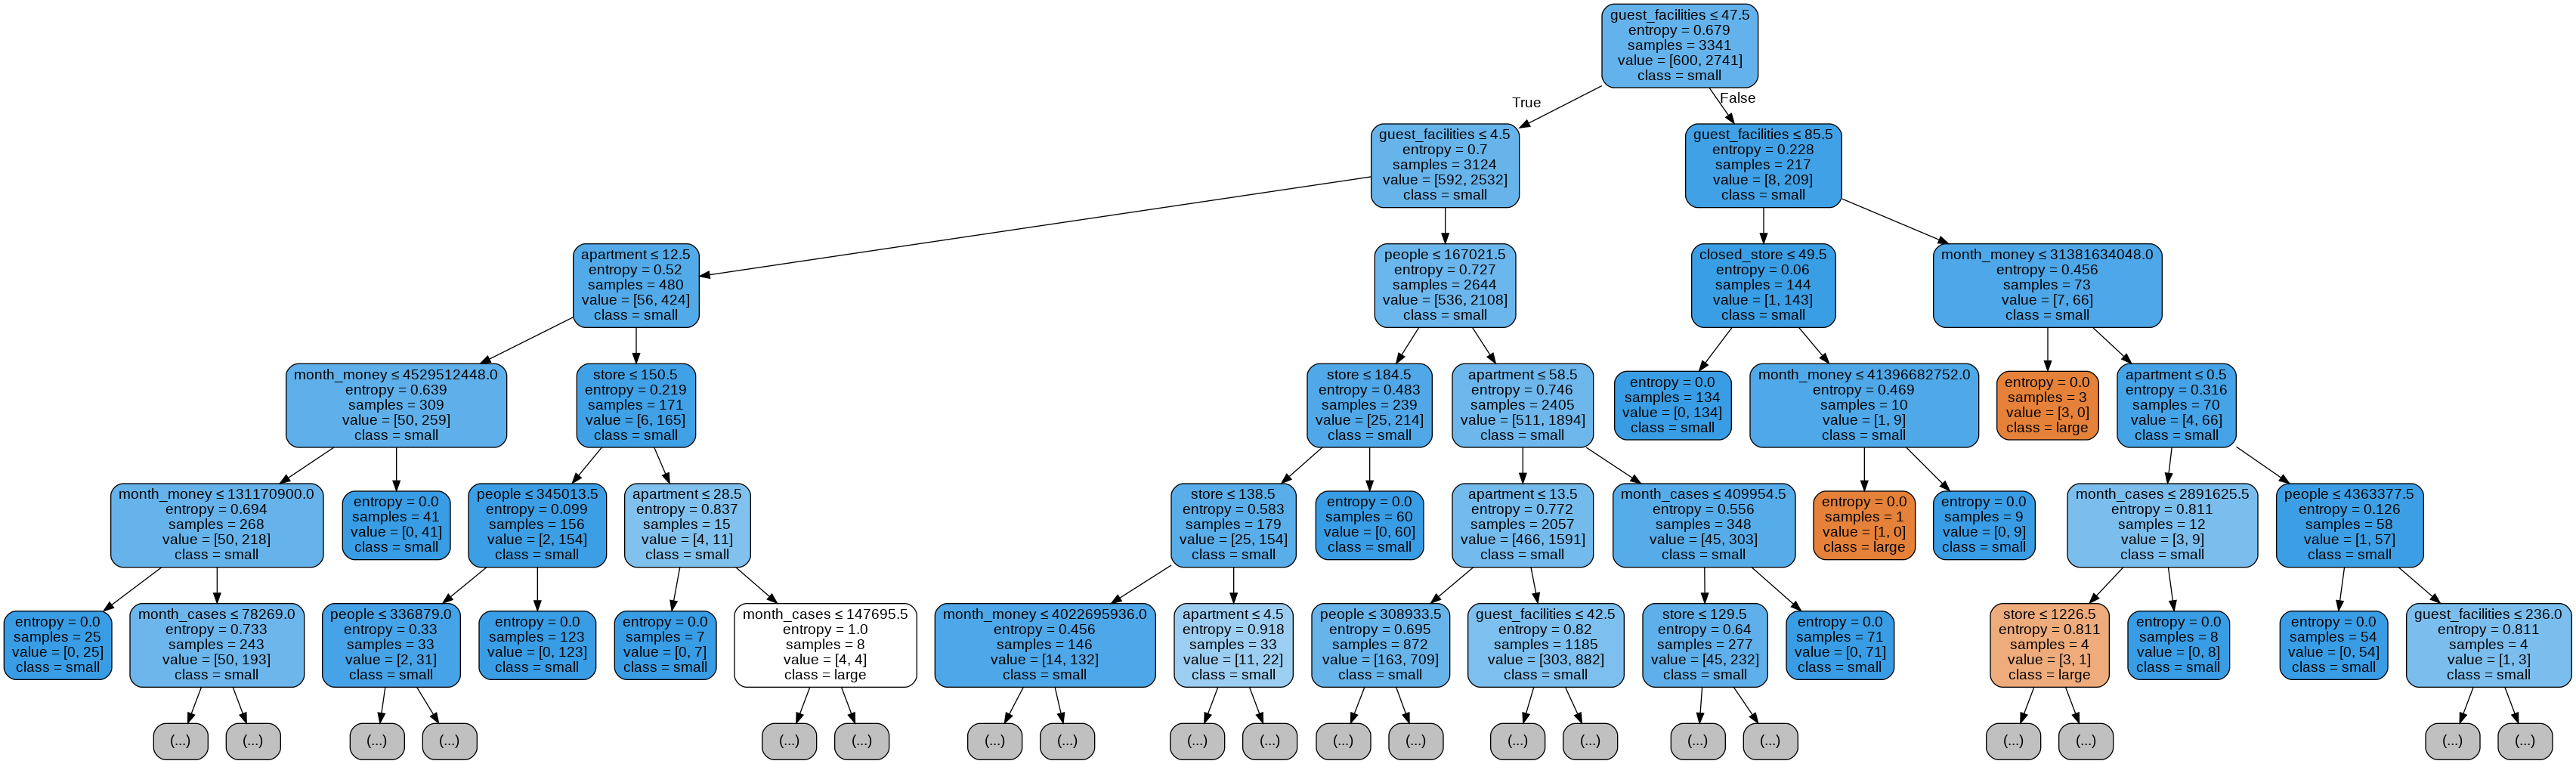

In [ ]:
Image(dt_graph.create_png())

In [ ]:
# random forest 시각화

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from IPython.display import Image

In [ ]:
import pandas as pd
import numpy as np
import pydotplus 
import os

In [ ]:
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/seouldata/data2019_3.csv")
data=data.dropna(axis=0)
data_colname=data.drop(['기준_년_코드','기준_분기_코드','상권_코드','상권_코드_명'],axis=1)
data_colname=data_colname.dropna(axis=0)
data_colname.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4455 entries, 0 to 4454
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   점포_수       4455 non-null   float64
 1   개업_점포_수    4455 non-null   float64
 2   폐업_점포_수    4455 non-null   float64
 3   당월_매출_금액   4455 non-null   float64
 4   당월_매출_건수   4455 non-null   float64
 5   총_유동인구_수   4455 non-null   float64
 6   집객시설_수     4455 non-null   float64
 7   총_직장_인구_수  4455 non-null   float64
 8   아파트_단지_수   4455 non-null   float64
 9   상권_변화_지표   4455 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 382.9 KB


In [ ]:
data_colname.columns=['store','open_store','closed_store','month_money','month_cases','people','guest_facilities','work_population','apartment','largeorsmall']
data_colname.head()

,store,open_store,closed_store,month_money,month_cases,people,guest_facilities,work_population,apartment,largeorsmall
0,217.0,4.0,4.0,3.373980e+09,247105.0,380891.0,73.0,348.0,29.0,1
1,116.0,2.0,9.0,5.786105e+09,285188.0,393683.0,8.0,486.0,3.0,0
2,301.0,7.0,8.0,8.605367e+09,340821.0,262249.0,41.0,4822.0,2.0,1
3,82.0,2.0,3.0,2.973229e+09,338724.0,751866.0,12.0,104.0,39.0,1
4,62.0,1.0,5.0,2.233832e+09,85510.0,162091.0,8.0,1080.0,37.0,1


In [ ]:
X=np.array(pd.DataFrame(data_colname,columns=['store','open_store','closed_store','month_money','month_cases','people','guest_facilities','work_population','apartment']))
y=np.array(pd.DataFrame(data_colname,columns=['largeorsmall']))
X_train,X_test,y_train,y_test=train_test_split(X,y)
X_train

array([[158.,  11.,  14., ...,  10.,  55.,  12.],
       [ 67.,   2.,   3., ...,   9., 108.,  29.],
       [105.,   1.,   2., ...,  10., 614., 103.],
       ...,
       [145.,   3.,   1., ...,  25.,  99.,   0.],
       [221.,   6.,   7., ...,   9., 354.,  53.],
       [164.,   2.,   4., ...,  11., 741.,  63.]])

In [ ]:
#학습-PRUNING
rf_clf = RandomForestClassifier(n_estimators=10)
rf_clf = rf_clf.fit(X_train, y_train)
#extract single tree
estimator = rf_clf.estimators_[5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
feature_names = data_colname.columns.tolist()
feature_names = feature_names[0:9]

In [ ]:
target_name = np.array(['large', 'small'])

In [ ]:
#그래프
!pip install graphviz

In [ ]:
os.environ["PATH"] += os.pathsep + '/usr/local/lib/python3.6/dist-packages (0.10.1)'

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
# Export
rf_dot_data=export_graphviz(estimator, out_file=None, 
                feature_names = feature_names,
                class_names = target_name,
                rounded = True, proportion = False, 
                precision = 2, #소숫점자리수
                filled = True,
                special_characters = True,
                max_depth=5)

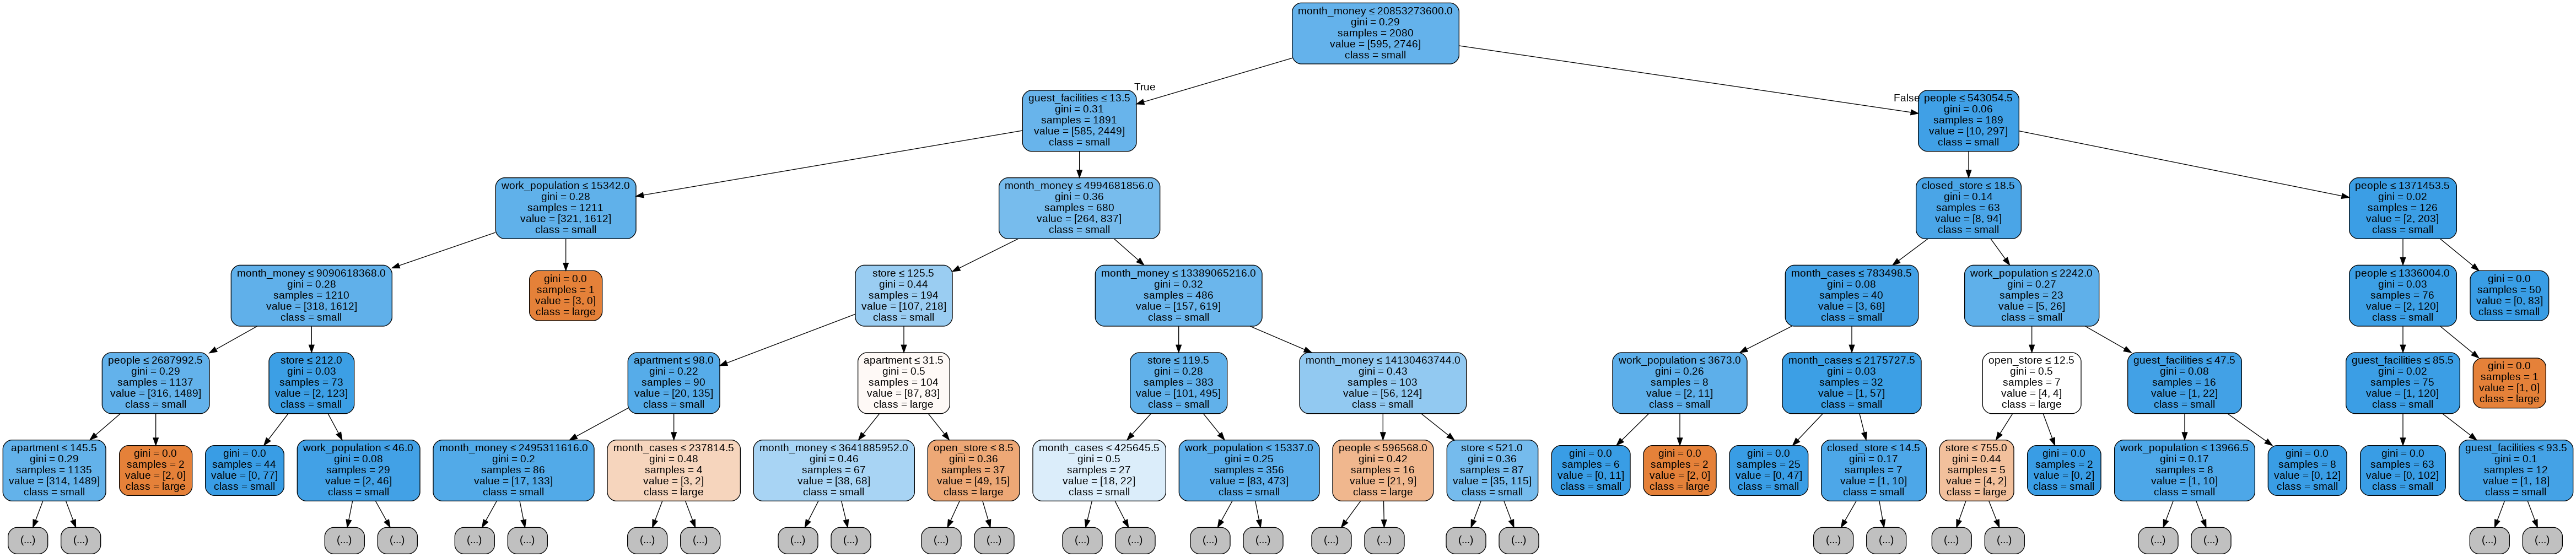

In [ ]:
rf_graph = pydotplus.graph_from_dot_data(rf_dot_data)
Image(rf_graph.create_png())